In [10]:
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-MiniLM-l6-v2"
embeddings = HuggingFaceEmbeddings(
    model_name=model_name
)


In [11]:
from langchain.vectorstores import Chroma
db3 = Chroma(persist_directory="./chroma_db2", embedding_function=embeddings)
docs = db3.similarity_search("diabeties", k=6)
# docs = db3.similarity_search(data, k=6)
query_res = docs[1::2]
query_res

[Document(page_content='"url": "https://www.webmd.com/diet/qa/is-my-hunger-caused-by-diabetes", "question": "Is my hunger caused by diabetes?", "answer": "Your body turns the sugar in food into fuel called glucose. But when you have diabetes, glucose can\'t reach your cells. Your body pees it out instead and tells you to eat more. People who have type 1 diabetes, in particular, may eat large amounts of food and still lose weight. In addition to a spike in your appetite, symptoms of diabetes may include: Extreme thirst The need to pee more often Weight loss you can\'t explain Blurry vision Cuts and bruises that take a long time to heal Tingling or pain in your hands or feet Fatigue Hypoglycemia is what you have when the glucose in your body drops to very low levels."'),
 Document(page_content='"url": "https://www.webmd.com/diabetes/qa/what-kind-of-foods-should-you-eat-if-you-have-diabetes", "question": "What kind of foods should you eat if you have diabetes?", "answer": "To keep your bl

In [1]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/3e/89/cbca600319463a91ae6a46e537d548900ddf2114df66c902344c4fe6bb4c/pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install matplotlib 

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ce/25/a557ee10ac9dce1300850024707ce1850a6958f1673a9194be878b99d631/matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/7b/66/b237cd16

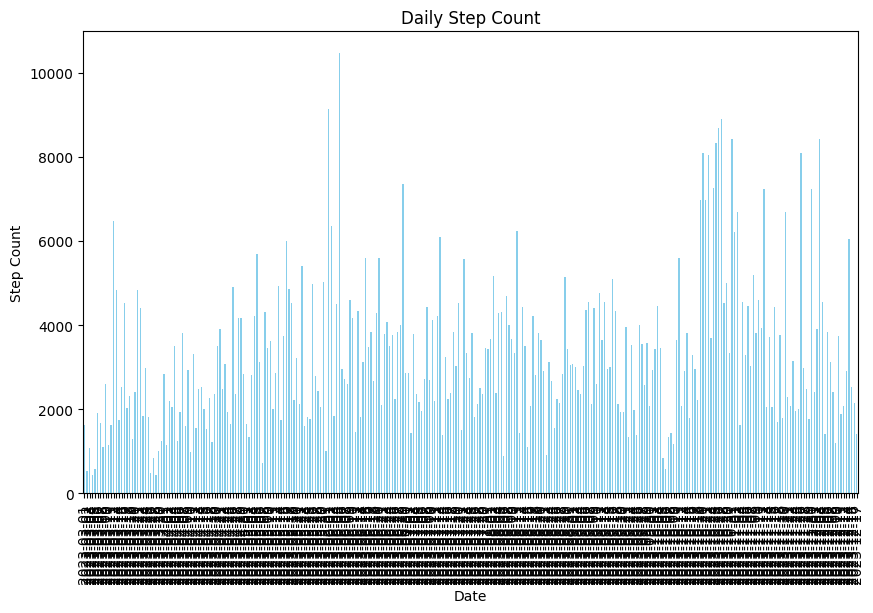

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
from datetime import datetime

# Read XML data from file
xml_file_path = 'apple_health_export/export.xml'  # Update with your file path
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Extract relevant data and create a DataFrame
records = []
for record in root.findall(".//Record[@type='HKQuantityTypeIdentifierStepCount']"):
    creation_date_str = record.attrib['creationDate']
    creation_date = datetime.strptime(creation_date_str, "%Y-%m-%d %H:%M:%S %z")
    step_count = int(record.attrib['value'])
    records.append({'CreationDate': creation_date, 'StepCount': step_count})

df = pd.DataFrame(records)

# Group by date and sum step counts
daily_activity = df.groupby(df['CreationDate'].dt.date)['StepCount'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
daily_activity.plot(kind='bar', color='skyblue')
plt.title('Daily Step Count')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.show()


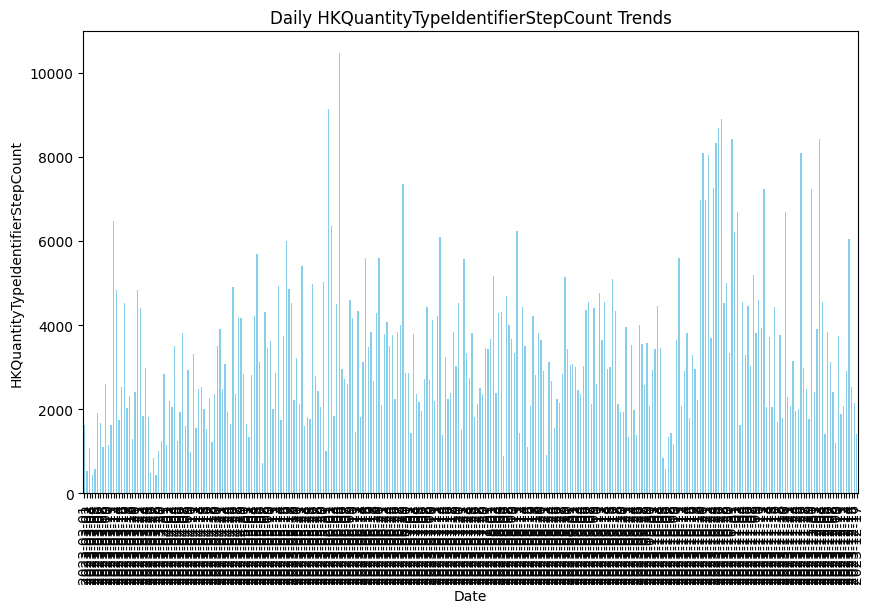

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
from datetime import datetime

def parse_health_data(xml_data, metric_type):
    root = ET.fromstring(xml_data)

    # Extract relevant data and create a DataFrame
    records = []
    for record in root.findall(f".//Record[@type='{metric_type}']"):
        creation_date_str = record.attrib['creationDate']
        creation_date = datetime.strptime(creation_date_str, "%Y-%m-%d %H:%M:%S %z")
        value = float(record.attrib['value']) if '.' in record.attrib['value'] else int(record.attrib['value'])
        records.append({'CreationDate': creation_date, 'Value': value})

    return pd.DataFrame(records)

def plot_metric(data, metric_type):
    # Group by date and aggregate values (e.g., sum for step count, mean for heart rate)
    daily_data = data.groupby(data['CreationDate'].dt.date)['Value'].agg('sum' if metric_type == 'HKQuantityTypeIdentifierStepCount' else 'mean')

    # Plot the data
    plt.figure(figsize=(10, 6))
    daily_data.plot(kind='bar', color='skyblue')
    plt.title(f'Daily {metric_type} Trends')
    plt.xlabel('Date')
    plt.ylabel(metric_type)
    plt.show()

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

# Replace 'HKQuantityTypeIdentifierStepCount' with the desired metric type
metric_type_to_plot = 'HKQuantityTypeIdentifierStepCount'

health_data = parse_health_data(xml_data, metric_type_to_plot)
plot_metric(health_data, metric_type_to_plot)


In [ ]:
All Metrics in the XML file:
HKQuantityTypeIdentifierActiveEnergyBurned
HKQuantityTypeIdentifierWalkingAsymmetryPercentage
HKQuantityTypeIdentifierBodyMass
HKQuantityTypeIdentifierHeight
HKQuantityTypeIdentifierStepCount
HKQuantityTypeIdentifierWalkingSpeed
HKQuantityTypeIdentifierBasalEnergyBurned
HKQuantityTypeIdentifierWalkingStepLength
HKQuantityTypeIdentifierFlightsClimbed
HKQuantityTypeIdentifierDistanceWalkingRunning
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage
HKQuantityTypeIdentifierAppleWalkingSteadiness

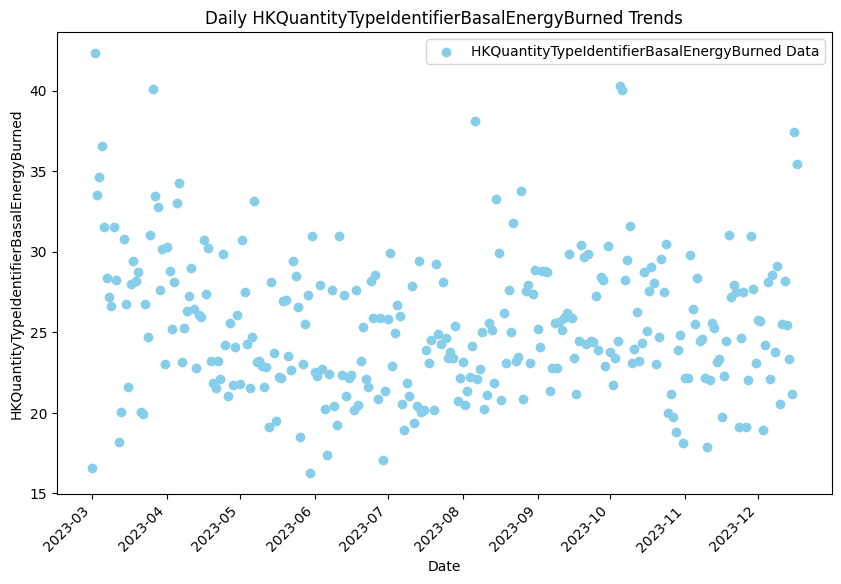

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
from datetime import datetime

def parse_health_data(xml_data, metric_type):
    root = ET.fromstring(xml_data)

    # Extract relevant data and create a DataFrame
    records = []
    for record in root.findall(f".//Record[@type='{metric_type}']"):
        creation_date_str = record.attrib['creationDate']
        creation_date = datetime.strptime(creation_date_str, "%Y-%m-%d %H:%M:%S %z")
        value = float(record.attrib['value']) if '.' in record.attrib['value'] else int(record.attrib['value'])
        records.append({'CreationDate': creation_date, 'Value': value})

    return pd.DataFrame(records)

def plot_metric(data, metric_type):
    # Group by date and aggregate values (e.g., sum for step count, mean for heart rate)
    daily_data = data.groupby(data['CreationDate'].dt.date)['Value'].agg('sum' if metric_type == 'HKQuantityTypeIdentifierStepCount' else 'mean')

    # Create a scatter plot with a time-based x-axis
    plt.figure(figsize=(10, 6))
    plt.scatter(daily_data.index, daily_data, color='skyblue', marker='o', label=f'{metric_type} Data')

    # Format the x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.title(f'Daily {metric_type} Trends')
    plt.xlabel('Date')
    plt.ylabel(metric_type)
    plt.legend()
    plt.show()

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

# Replace 'HKQuantityTypeIdentifierStepCount' with the desired metric type
metric_type_to_plot = 'HKQuantityTypeIdentifierBasalEnergyBurned'

health_data = parse_health_data(xml_data, metric_type_to_plot)
plot_metric(health_data, metric_type_to_plot)


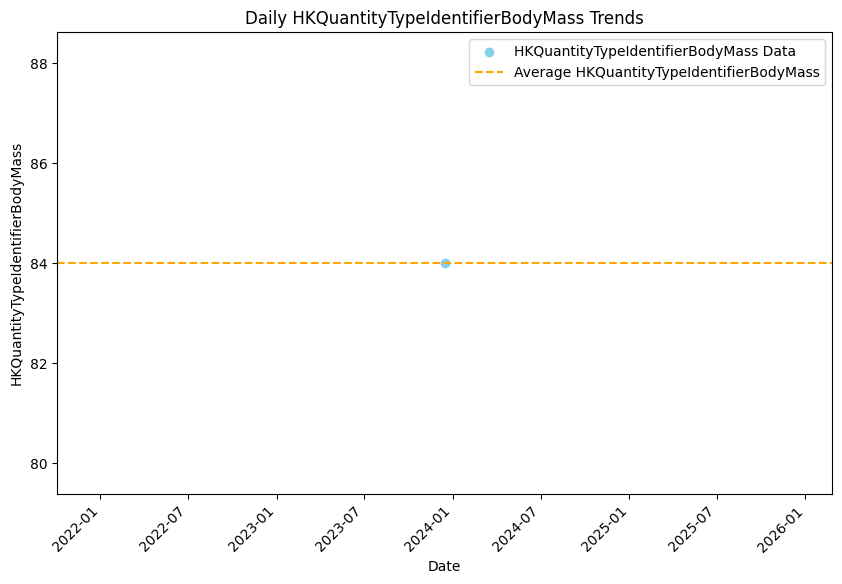

Average HKQuantityTypeIdentifierBodyMass: 84.00


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
from datetime import datetime

def parse_health_data(xml_data, metric_type):
    root = ET.fromstring(xml_data)

    # Extract relevant data and create a DataFrame
    records = []
    for record in root.findall(f".//Record[@type='{metric_type}']"):
        creation_date_str = record.attrib['creationDate']
        creation_date = datetime.strptime(creation_date_str, "%Y-%m-%d %H:%M:%S %z")
        value = float(record.attrib['value']) if '.' in record.attrib['value'] else int(record.attrib['value'])
        records.append({'CreationDate': creation_date, 'Value': value})

    return pd.DataFrame(records)

def analyze_and_plot_metric(data, metric_type):
    # Group by date and aggregate values (e.g., sum for step count, mean for heart rate)
    daily_data = data.groupby(data['CreationDate'].dt.date)['Value'].agg('sum' if metric_type == 'HKQuantityTypeIdentifierStepCount' else 'mean')

    # Calculate average daily step count
    average_step_count = daily_data.mean()

    # Create a scatter plot with a time-based x-axis
    plt.figure(figsize=(10, 6))
    plt.scatter(daily_data.index, daily_data, color='skyblue', marker='o', label=f'{metric_type} Data')

    # Plot the average step count as a horizontal line
    plt.axhline(y=average_step_count, color='orange', linestyle='--', label=f'Average {metric_type}')

    # Format the x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.title(f'Daily {metric_type} Trends')
    plt.xlabel('Date')
    plt.ylabel(metric_type)
    plt.legend()
    plt.show()

    # Print the average step count
    print(f'Average {metric_type}: {average_step_count:.2f}')

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

# Replace 'HKQuantityTypeIdentifierStepCount' with the desired metric type
metric_type_to_plot = 'HKQuantityTypeIdentifierBodyMass'

health_data = parse_health_data(xml_data, metric_type_to_plot)
analyze_and_plot_metric(health_data, metric_type_to_plot)


In [16]:
import pandas as pd
from xml.etree import ElementTree as ET

def list_all_metrics(xml_data):
    root = ET.fromstring(xml_data)

    # Find all unique metric types in the XML file
    metric_types = set(record.attrib['type'] for record in root.findall(".//Record"))

    # Print the list of metric types
    print("All Metrics in the XML file:")
    for metric_type in metric_types:
        print(metric_type)

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

list_all_metrics(xml_data)


All Metrics in the XML file:
HKQuantityTypeIdentifierActiveEnergyBurned
HKQuantityTypeIdentifierWalkingAsymmetryPercentage
HKQuantityTypeIdentifierBodyMass
HKQuantityTypeIdentifierHeight
HKQuantityTypeIdentifierStepCount
HKQuantityTypeIdentifierWalkingSpeed
HKQuantityTypeIdentifierBasalEnergyBurned
HKQuantityTypeIdentifierWalkingStepLength
HKQuantityTypeIdentifierFlightsClimbed
HKQuantityTypeIdentifierDistanceWalkingRunning
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage
HKQuantityTypeIdentifierAppleWalkingSteadiness


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
from datetime import datetime

def parse_health_data(xml_data, metric_type):
    root = ET.fromstring(xml_data)

    # Extract relevant data and create a DataFrame
    records = []
    for record in root.findall(f".//Record[@type='{metric_type}']"):
        creation_date_str = record.attrib['creationDate']
        creation_date = datetime.strptime(creation_date_str, "%Y-%m-%d %H:%M:%S %z")
        value = float(record.attrib['value']) if '.' in record.attrib['value'] else int(record.attrib['value'])
        records.append({'CreationDate': creation_date, 'Value': value})

    return pd.DataFrame(records)

def analyze_and_plot_metric(data, metric_type):
    # Group by date and aggregate values
    daily_data = data.groupby(data['CreationDate'].dt.date)['Value'].agg('sum' if metric_type in ['HKQuantityTypeIdentifierStepCount', 'HKQuantityTypeIdentifierFlightsClimbed'] else 'mean')

    # Calculate average value
    average_value = daily_data.mean()

    # Create a scatter plot with a time-based x-axis
    plt.figure(figsize=(10, 6))
    plt.scatter(daily_data.index, daily_data, color='skyblue', marker='o', label=f'{metric_type} Data')

    # Plot the average value as a horizontal line
    plt.axhline(y=average_value, color='orange', linestyle='--', label=f'Average {metric_type}')

    # Format the x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.title(f'Daily {metric_type} Trends')
    plt.xlabel('Date')
    plt.ylabel(metric_type)
    plt.legend()
    plt.show()

    # Print the average value
    print(f'Average {metric_type}: {average_value:.2f}')

# Mapping between metric types and user-friendly names
metric_type_mapping = {
    'HKQuantityTypeIdentifierActiveEnergyBurned': 'Active Energy Burned',
    'HKQuantityTypeIdentifierWalkingAsymmetryPercentage': 'Walking Asymmetry Percentage',
    'HKQuantityTypeIdentifierBodyMass': 'Weight',
    'HKQuantityTypeIdentifierHeight': 'Height',
    'HKQuantityTypeIdentifierStepCount': 'Step Count',
    'HKQuantityTypeIdentifierWalkingSpeed': 'Walking Speed',
    'HKQuantityTypeIdentifierBasalEnergyBurned': 'Basal Energy Burned',
    'HKQuantityTypeIdentifierWalkingStepLength': 'Walking Step Length',
    'HKQuantityTypeIdentifierFlightsClimbed': 'Flights Climbed',
    'HKQuantityTypeIdentifierDistanceWalkingRunning': 'Distance Walking/Running',
    'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage': 'Walking Double Support Percentage',
    'HKQuantityTypeIdentifierAppleWalkingSteadiness': 'Apple Walking Steadiness',
}

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

# Choose the desired metric type from the mapping
metric_type_to_plot = 'Step Count'

health_data = parse_health_data(xml_data, metric_type_to_plot)
analyze_and_plot_metric(health_data, metric_type_to_plot)


KeyError: 'CreationDate'

In [2]:
import pandas as pd
from xml.etree import ElementTree as ET

def calculate_average_values(xml_data):
    root = ET.fromstring(xml_data)

    # Create an empty dictionary to store data for each metric type
    metric_data = {}

    # Extract relevant data and create a DataFrame for each metric type
    for metric_type in ["HKQuantityTypeIdentifierActiveEnergyBurned",
                        "HKQuantityTypeIdentifierWalkingAsymmetryPercentage",
                        "HKQuantityTypeIdentifierBodyMass",
                        "HKQuantityTypeIdentifierHeight",
                        "HKQuantityTypeIdentifierStepCount",
                        "HKQuantityTypeIdentifierWalkingSpeed",
                        "HKQuantityTypeIdentifierBasalEnergyBurned",
                        "HKQuantityTypeIdentifierWalkingStepLength",
                        "HKQuantityTypeIdentifierFlightsClimbed",
                        "HKQuantityTypeIdentifierDistanceWalkingRunning",
                        "HKQuantityTypeIdentifierWalkingDoubleSupportPercentage",
                        "HKQuantityTypeIdentifierAppleWalkingSteadiness"]:

        records = []
        for record in root.findall(f".//Record[@type='{metric_type}']"):
            value = float(record.attrib['value']) if '.' in record.attrib['value'] else int(record.attrib['value'])
            records.append({'Value': value})

        metric_data[metric_type] = pd.DataFrame(records)

    # Calculate and print average values for each metric type
    print("Average Values for Each Metric:")
    for metric_type, data in metric_data.items():
        average_value = data['Value'].mean()
        print(f"{metric_type}: {average_value:.2f}")

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

calculate_average_values(xml_data)


Average Values for Each Metric:
HKQuantityTypeIdentifierActiveEnergyBurned: 2.25
HKQuantityTypeIdentifierWalkingAsymmetryPercentage: 0.08
HKQuantityTypeIdentifierBodyMass: 84.00
HKQuantityTypeIdentifierHeight: 180.00
HKQuantityTypeIdentifierStepCount: 116.73
HKQuantityTypeIdentifierWalkingSpeed: 3.16
HKQuantityTypeIdentifierBasalEnergyBurned: 24.72
HKQuantityTypeIdentifierWalkingStepLength: 57.58
HKQuantityTypeIdentifierFlightsClimbed: 1.53
HKQuantityTypeIdentifierDistanceWalkingRunning: 0.08
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage: 0.32
HKQuantityTypeIdentifierAppleWalkingSteadiness: 0.78


In [3]:
import pandas as pd
from xml.etree import ElementTree as ET

def calculate_average_values(xml_data):
    root = ET.fromstring(xml_data)

    # Create a mapping for simpler headings
    metric_mapping = {
        "HKQuantityTypeIdentifierActiveEnergyBurned": "Active Energy Burned",
        "HKQuantityTypeIdentifierWalkingAsymmetryPercentage": "Walking Asymmetry Percentage",
        "HKQuantityTypeIdentifierBodyMass": "Body Mass",
        "HKQuantityTypeIdentifierHeight": "Height",
        "HKQuantityTypeIdentifierStepCount": "Step Count",
        "HKQuantityTypeIdentifierWalkingSpeed": "Walking Speed",
        "HKQuantityTypeIdentifierBasalEnergyBurned": "Basal Energy Burned",
        "HKQuantityTypeIdentifierWalkingStepLength": "Walking Step Length",
        "HKQuantityTypeIdentifierFlightsClimbed": "Flights Climbed",
        "HKQuantityTypeIdentifierDistanceWalkingRunning": "Distance Walking/Running",
        "HKQuantityTypeIdentifierWalkingDoubleSupportPercentage": "Walking Double Support Percentage",
        "HKQuantityTypeIdentifierAppleWalkingSteadiness": "Apple Walking Steadiness"
    }

    # Create an empty dictionary to store data for each metric type
    metric_data = {}

    # Extract relevant data and create a DataFrame for each metric type
    for metric_type, heading in metric_mapping.items():
        records = []
        for record in root.findall(f".//Record[@type='{metric_type}']"):
            value = float(record.attrib['value']) if '.' in record.attrib['value'] else int(record.attrib['value'])
            records.append({'Value': value})

        metric_data[heading] = pd.DataFrame(records)

    # Calculate and print average values for each metric type
    print("Average Values for Each Metric:")
    for heading, data in metric_data.items():
        average_value = data['Value'].mean()
        print(f"{heading}: {average_value:.2f}")

# Example usage:
# Replace 'path/to/health_data.xml' with the actual path to your Apple Health XML file
xml_file_path = 'apple_health_export/export.xml'
with open(xml_file_path, 'r') as file:
    xml_data = file.read()

calculate_average_values(xml_data)


Average Values for Each Metric:
Active Energy Burned: 2.25
Walking Asymmetry Percentage: 0.08
Body Mass: 84.00
Height: 180.00
Step Count: 116.73
Walking Speed: 3.16
Basal Energy Burned: 24.72
Walking Step Length: 57.58
Flights Climbed: 1.53
Distance Walking/Running: 0.08
Walking Double Support Percentage: 0.32
Apple Walking Steadiness: 0.78
